In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Extração de Dados

In [2]:
df = pd.read_csv('/kaggle/input/height-of-male-and-female-by-country-2022/Height of Male and Female by Country 2022.csv')
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


# Análise Exploratória de Dados

In [3]:
# Descreve informações a respeito da variável categórica (Nome do país)
df.describe(include = 'object')

,Country Name
count,199
unique,199
top,Netherlands
freq,1


In [4]:
# Checa o shape do dataset
df.shape

(199, 6)

In [5]:
# Checa o nome de todas as colunas
df.columns

Index(['Rank', 'Country Name', 'Male Height in Cm', 'Female Height in Cm',
       'Male Height in Ft', 'Female Height in Ft'],
      dtype='object')

In [6]:
# Informa o tipo de dado em cada uma das colunas
df.dtypes

Rank                     int64
Country Name            object
Male Height in Cm      float64
Female Height in Cm    float64
Male Height in Ft      float64
Female Height in Ft    float64
dtype: object

In [7]:
# Informa se há algum dado faltante no dataset
df.isnull().sum()

Rank                   0
Country Name           0
Male Height in Cm      0
Female Height in Cm    0
Male Height in Ft      0
Female Height in Ft    0
dtype: int64

In [8]:
# Elimina possíveis linhas duplicadas 
df.drop_duplicates(subset='Country Name', inplace=True)
df.shape

(199, 6)

Nesta análise consideraremos os dados informados em centímetros ("Cm"), então retiraremos do dataset as colunas que possuam informações em pés ("Ft")

In [9]:
df.drop(['Male Height in Ft','Female Height in Ft'], axis=1, inplace=True)
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm
0,1,Netherlands,183.78,170.36
1,2,Montenegro,183.30,169.96
2,3,Estonia,182.79,168.66
3,4,Bosnia and Herzegovina,182.47,167.47
4,5,Iceland,182.10,168.91


In [10]:
new_df = df.iloc[:,1::]
# Checa a correlação entre cada uma das variáveis (Altura Masculina e Altura Feminina)
new_df.corr()


,Male Height in Cm,Female Height in Cm
Male Height in Cm,1.000000,0.928787
Female Height in Cm,0.928787,1.000000


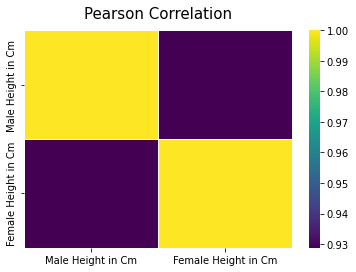

In [11]:
# Visualiza a correlação entre cada uma das variáveis utilizando o coeficiente de correlação de pearson

sns.heatmap(new_df.corr(), vmax = 1, linewidths = 0.9, cmap = 'viridis')
plt.title('Pearson Correlation', fontsize = 15, pad = 12)
plt.show()

# **Países com maior altura entre os homens:**

**5 países com maior altura entre os homens**

,Rank,Country Name,Male Height in Cm
0,1,Netherlands,183.78
1,2,Montenegro,183.30
2,3,Estonia,182.79
3,4,Bosnia and Herzegovina,182.47
4,5,Iceland,182.10


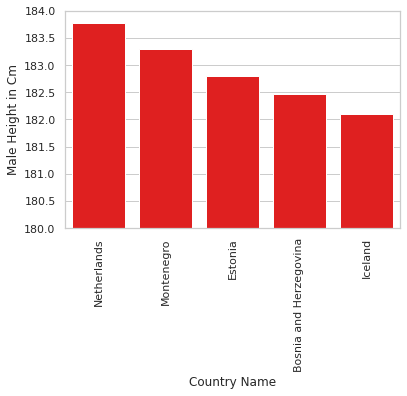

In [12]:
hightest_male = df.drop('Female Height in Cm',axis=1)
hightest_male = hightest_male.sort_values(by=['Male Height in Cm'],ascending=False)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=hightest_male["Country Name"][:5], y=hightest_male["Male Height in Cm"][:5], data=hightest_male,color='red')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=180,ymax=184)
hightest_male.head()

# **Países com maior altura entre as mulheres:**

**5 países com maior altura entre as mulheres**

,Rank,Country Name,Female Height in Cm
0,1,Netherlands,170.36
1,2,Montenegro,169.96
5,6,Denmark,169.47
4,5,Iceland,168.91
7,8,Latvia,168.81


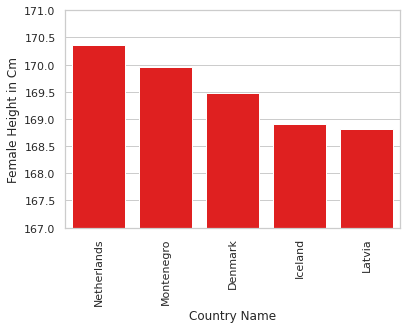

In [13]:
hightest_female = df.drop('Male Height in Cm',axis=1)
hightest_female = hightest_female.sort_values(by=['Female Height in Cm'],ascending=False)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=hightest_female["Country Name"][:5], y=hightest_female["Female Height in Cm"][:5], data=hightest_female,color='red')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=167,ymax=171)
hightest_female.head()

# **Países com menor altura entre os homens:**

**5 países com menor altura entre os homens**

,Rank,Country Name,Male Height in Cm
198,199,Timor-Leste,160.13
197,198,Laos,162.78
196,197,Solomon Islands,163.07
195,196,Papua New Guinea,163.10
194,195,Mozambique,164.30


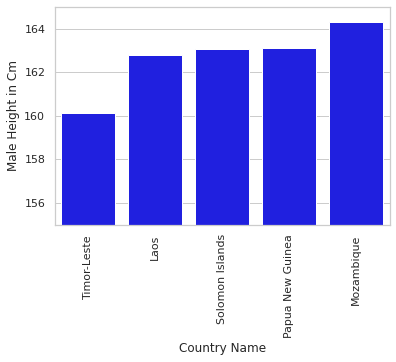

In [14]:
shortest_male = df.drop('Female Height in Cm',axis=1)
shortest_male = shortest_male.sort_values(by=['Male Height in Cm'],ascending=True)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=shortest_male["Country Name"][:5], y=shortest_male["Male Height in Cm"][:5], data=shortest_male,color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=155,ymax=165)
shortest_male.head()

# **Países com menor altura entre as mulheres:**

**5 países com menor altura entre as mulheres**

,Rank,Country Name,Female Height in Cm
193,194,Guatemala,150.91
190,191,Bangladesh,152.38
192,193,Nepal,152.39
198,199,Timor-Leste,152.71
189,190,Madagascar,153.06


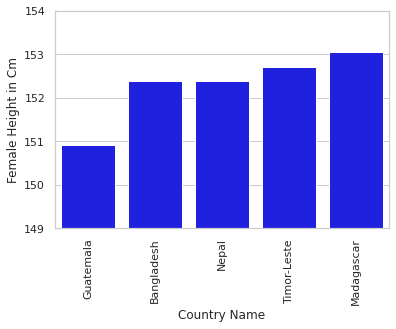

In [15]:
shortest_female = df.drop('Male Height in Cm',axis=1)
shortest_female = shortest_female.sort_values(by=['Female Height in Cm'],ascending=True)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=shortest_female["Country Name"][:5], y=shortest_female["Female Height in Cm"][:5], data=shortest_female,color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=149,ymax=154)
shortest_female.head()

# **Altura Média entre os Países:**

In [16]:
df['Mean Height in Cm'] = 0.5*(df['Male Height in Cm']+df['Female Height in Cm'])
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Mean Height in Cm
0,1,Netherlands,183.78,170.36,177.070
1,2,Montenegro,183.30,169.96,176.630
2,3,Estonia,182.79,168.66,175.725
3,4,Bosnia and Herzegovina,182.47,167.47,174.970
4,5,Iceland,182.10,168.91,175.505


In [17]:
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Mean Height in Cm
0,1,Netherlands,183.78,170.36,177.070
1,2,Montenegro,183.30,169.96,176.630
2,3,Estonia,182.79,168.66,175.725
3,4,Bosnia and Herzegovina,182.47,167.47,174.970
4,5,Iceland,182.10,168.91,175.505


**5 países com maior altura média**

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Mean Height in Cm
0,1,Netherlands,183.78,170.36,177.070
1,2,Montenegro,183.30,169.96,176.630
2,3,Estonia,182.79,168.66,175.725
5,6,Denmark,181.89,169.47,175.680
4,5,Iceland,182.10,168.91,175.505


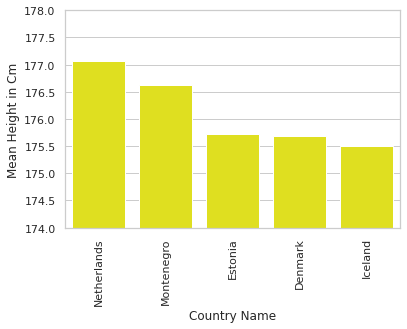

In [18]:
mean_height = df
mean_height = mean_height.sort_values(by=['Mean Height in Cm'],ascending=False)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=mean_height["Country Name"][:5], y=mean_height["Mean Height in Cm"][:5], data=hightest_male,color='yellow')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=174,ymax=178)
mean_height.head()

**5 países com menor altura média**

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Mean Height in Cm
198,199,Timor-Leste,160.13,152.71,156.420
193,194,Guatemala,164.36,150.91,157.635
197,198,Laos,162.78,153.10,157.940
192,193,Nepal,164.36,152.39,158.375
190,191,Bangladesh,165.08,152.38,158.730


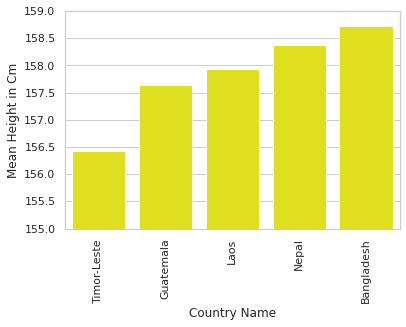

In [19]:
mean_height = mean_height.sort_values(by=['Mean Height in Cm'],ascending=True)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=mean_height["Country Name"][:5], y=mean_height["Mean Height in Cm"][:5], data=hightest_male,color='yellow')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=155,ymax=159)
mean_height.head()

**Conclusões a partir da análise destes dados**

* A Holanda é o país com a maior média de altura tanto masculina quanto feminina;
* Montenegro é o país com a segunda maior média de altura para ambos os sexos;
* Timor-Leste é o país com a menor média de altura masculina e está no TOP 5 de países com a menor média de altura para o sexo feminino;
* Guatemala é o país com a menor média de altura para o sexo feminino;
* Os países com a maior média de altura são europeus;
* Os países com a menor média de altura são asiáticos;